In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
df=pd.read_csv("Admission_Prediction.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
pr=ProfileReport(df)
pr.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

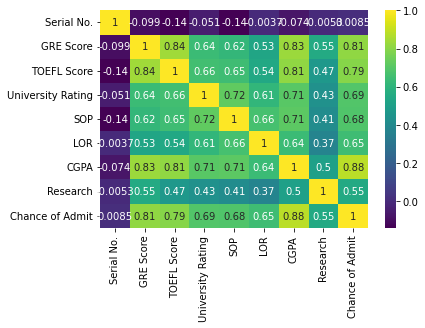

In [8]:
sns.heatmap(df.corr(),annot=True, cbar=True, cmap="viridis")

In [9]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
#This is not the best way of filling the missing data. we have some imputation techniques from which we can fill the missing data.
df["GRE Score"]=df["GRE Score"].fillna(df["GRE Score"].mean())

In [11]:
df["TOEFL Score"]=df["TOEFL Score"].fillna(df["TOEFL Score"].mean())

In [12]:
df["University Rating"]=df["University Rating"].fillna(df["University Rating"].mean())

In [13]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
df.drop("Serial No.",inplace=True,axis=1)

In [16]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [17]:
X=df.drop("Chance of Admit",axis=1)
y=df["Chance of Admit"]

#Standar scaler


#we can observe that the data has different range in different columns. Thats why we nee to scale the data into the same range.

#we can see that the data has different variance.


#we can normally, use the same data also. But it will be a little bit harder for our model to find the relationship between the feature and label.

In [18]:
scaler= StandardScaler()  #mean will be 0.
arr=scaler.fit_transform(X)
df1=pd.DataFrame(arr)

In [19]:
df1.head()

,0,1,2,3,4,5,6
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152


In [20]:
df1.describe()

,0,1,2,3,4,5,6
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.350520e-15,9.419132e-16,5.608847e-16,2.926548e-16,-1.332268e-17,3.091971e-15,-2.202682e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.394225e+00,-2.512331e+00,-1.881441e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.814090e-01,-6.927310e-01,-9.946589e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,5.124333e-15,-3.105811e-02,-1.078766e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.708143e-01,7.960330e-01,7.789057e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.113186e+00,2.119379e+00,1.665688e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


In [21]:
#Multicollinearity.

<AxesSubplot:>

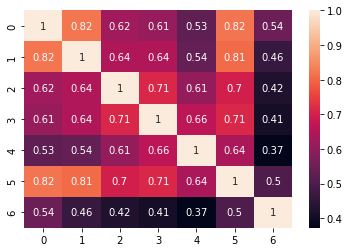

In [22]:
sns.heatmap(df1.corr(),annot=True,cbar=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()

In [24]:
arr.shape

(500, 7)

In [25]:
arr.shape[1]

7

In [26]:
vif_df["vif"]=[variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [27]:
vif_df["feature"]=X.columns

In [28]:
vif_df

,vif,feature
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


#In the above dataframe, there is not any feature that has the value more than 10. Thats why we dont need to drop any columns and non of the above feature is multicollinear.

In [29]:
#Splitting the data into train and test. 

In [30]:
df1

,0,1,2,3,4,5,6
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


In [113]:
X_train,X_test,y_train,y_test= train_test_split(df1,y,test_size=0.2,random_state=50)
#random_state in here is just like a random.seed operation in numpy.
#If we dont use random_state then every time the value of the training and testing data will change.
#And random_state will help to fix the data based on the given value for everyone.

In [114]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [115]:
y_train.shape,y_test.shape

((400,), (100,))

In [116]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [117]:
pickle.dump(model,open("admission_lr_model.pickle","wb"))

In [118]:
#!ls

In [119]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [120]:
model.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])  
#this is giving us the wrong output because, we have scaled the data before training the model. 
#And now we are using the original data instead of the scaled one.
#thats why the predicted output is so far of the expected output.

array([10.32621228])

In [121]:
test1=scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])

In [122]:
test1

array([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [123]:
model.predict([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429, 1.77680627, 0.886405261]])
#In this we are using the scaled data. So the predicted output is near to the expected output.

array([0.95505896])

In [124]:
pickle.load(open("admission_lr_model.pickle","rb"))

LinearRegression()

In [125]:
model.predict(test1)

array([0.95505896])

In [126]:
model.score(X_test,y_test)  #R^2

0.8376849519858373

In [127]:
def adj_r2(x,y):
    r2=model.score(x,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
    

In [129]:
adj_r2(X_test,y_test)

0.8353755915466113

In [130]:
model.coef_

array([0.0209504 , 0.01440417, 0.00708969, 0.00027898, 0.01483285,
       0.07620874, 0.01158846])

In [131]:
model.intercept_

0.7228701187149952

## LASSO and LASSOCV

In [151]:
Lassocv=LassoCV(cv=10,max_iter=20000000,normalize=True)  #cv=cross validation
Lassocv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=20000000, normalize=True)

In [152]:
Lassocv.alpha_  #alpha=  λ of the lasso formula which is the shrinkage factor

3.0784359382296887e-05

In [153]:
lasso=Lasso(alpha=Lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=3.0784359382296887e-05)

In [154]:
lasso.score(X_test,y_test)

0.8376821062973637

## Ridge and RidgeCV

In [160]:
Ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)  #cv=cross validation
Ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.63543877, 8.69472407, 7.16432564, 4.05187294, 2.80151941,
       6.67582799, 0.88121707, 5.42498547, 8.43208673, 3.51905744,
       2.45469885, 7.88063322, 8.01979656, 3.94508424, 5.46932916,
       3.01606563, 8.47465226, 5.84686219, 2.0807906 , 7.00087124,
       0.29324796, 0.25285078, 7.37402049, 6.59303093, 0.98899264,
       8.79157304, 9.14657772, 7.69933634, 6.8081448 , 8.98189675,
       4.9454248 , 2.60215409, 7.62686226, 3.11752553, 1.30043068,
       7.1039565 , 8.84035665, 2.28081366, 1.53008806, 7.80954136,
       5.87273401, 4.44487039, 9.56013933, 7.5781193 , 0.61240295,
       6.87962595, 8.51859234, 8.42093374, 8.26765045, 7.13372613]),
        cv=10, normalize=True)

In [161]:
Ridgecv.alpha_

0.25285077777273957

In [163]:
ridge_lr=Ridge(alpha=Ridgecv.alpha_)
ridge_lr.fit(X_train,y_train)

Ridge(alpha=0.25285077777273957)

In [164]:
ridge_lr.score(X_test,y_test)

0.8377479451518468

## ElasticNet and ElasticNetCV

In [165]:
elasticcv=ElasticNetCV(alphas=None,cv=10,normalize=True)
elasticcv.fit(X_train,y_train)

ElasticNetCV(cv=10, normalize=True)

In [166]:
elasticcv.alpha_

4.994028600218156e-05

In [167]:
elasticcv.l1_ratio

0.5

In [169]:
elastic_lr= ElasticNet(alpha=elasticcv.alpha_,l1_ratio=elasticcv.l1_ratio_)

In [170]:
elastic_lr.fit(X_train,y_train)

ElasticNet(alpha=4.994028600218156e-05)

In [171]:
elastic_lr.score(X_test,y_test)

0.8376849932819382